<a href="https://colab.research.google.com/github/shivangraikar/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

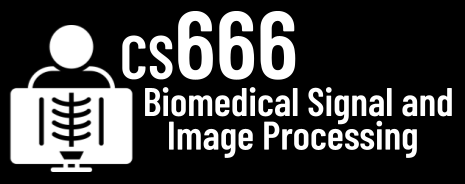
#Assignment 5

In [1]:
# NAME: Shivang Raikar

In [2]:
 # In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [6]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [7]:
# TODO: 220

In [8]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [9]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

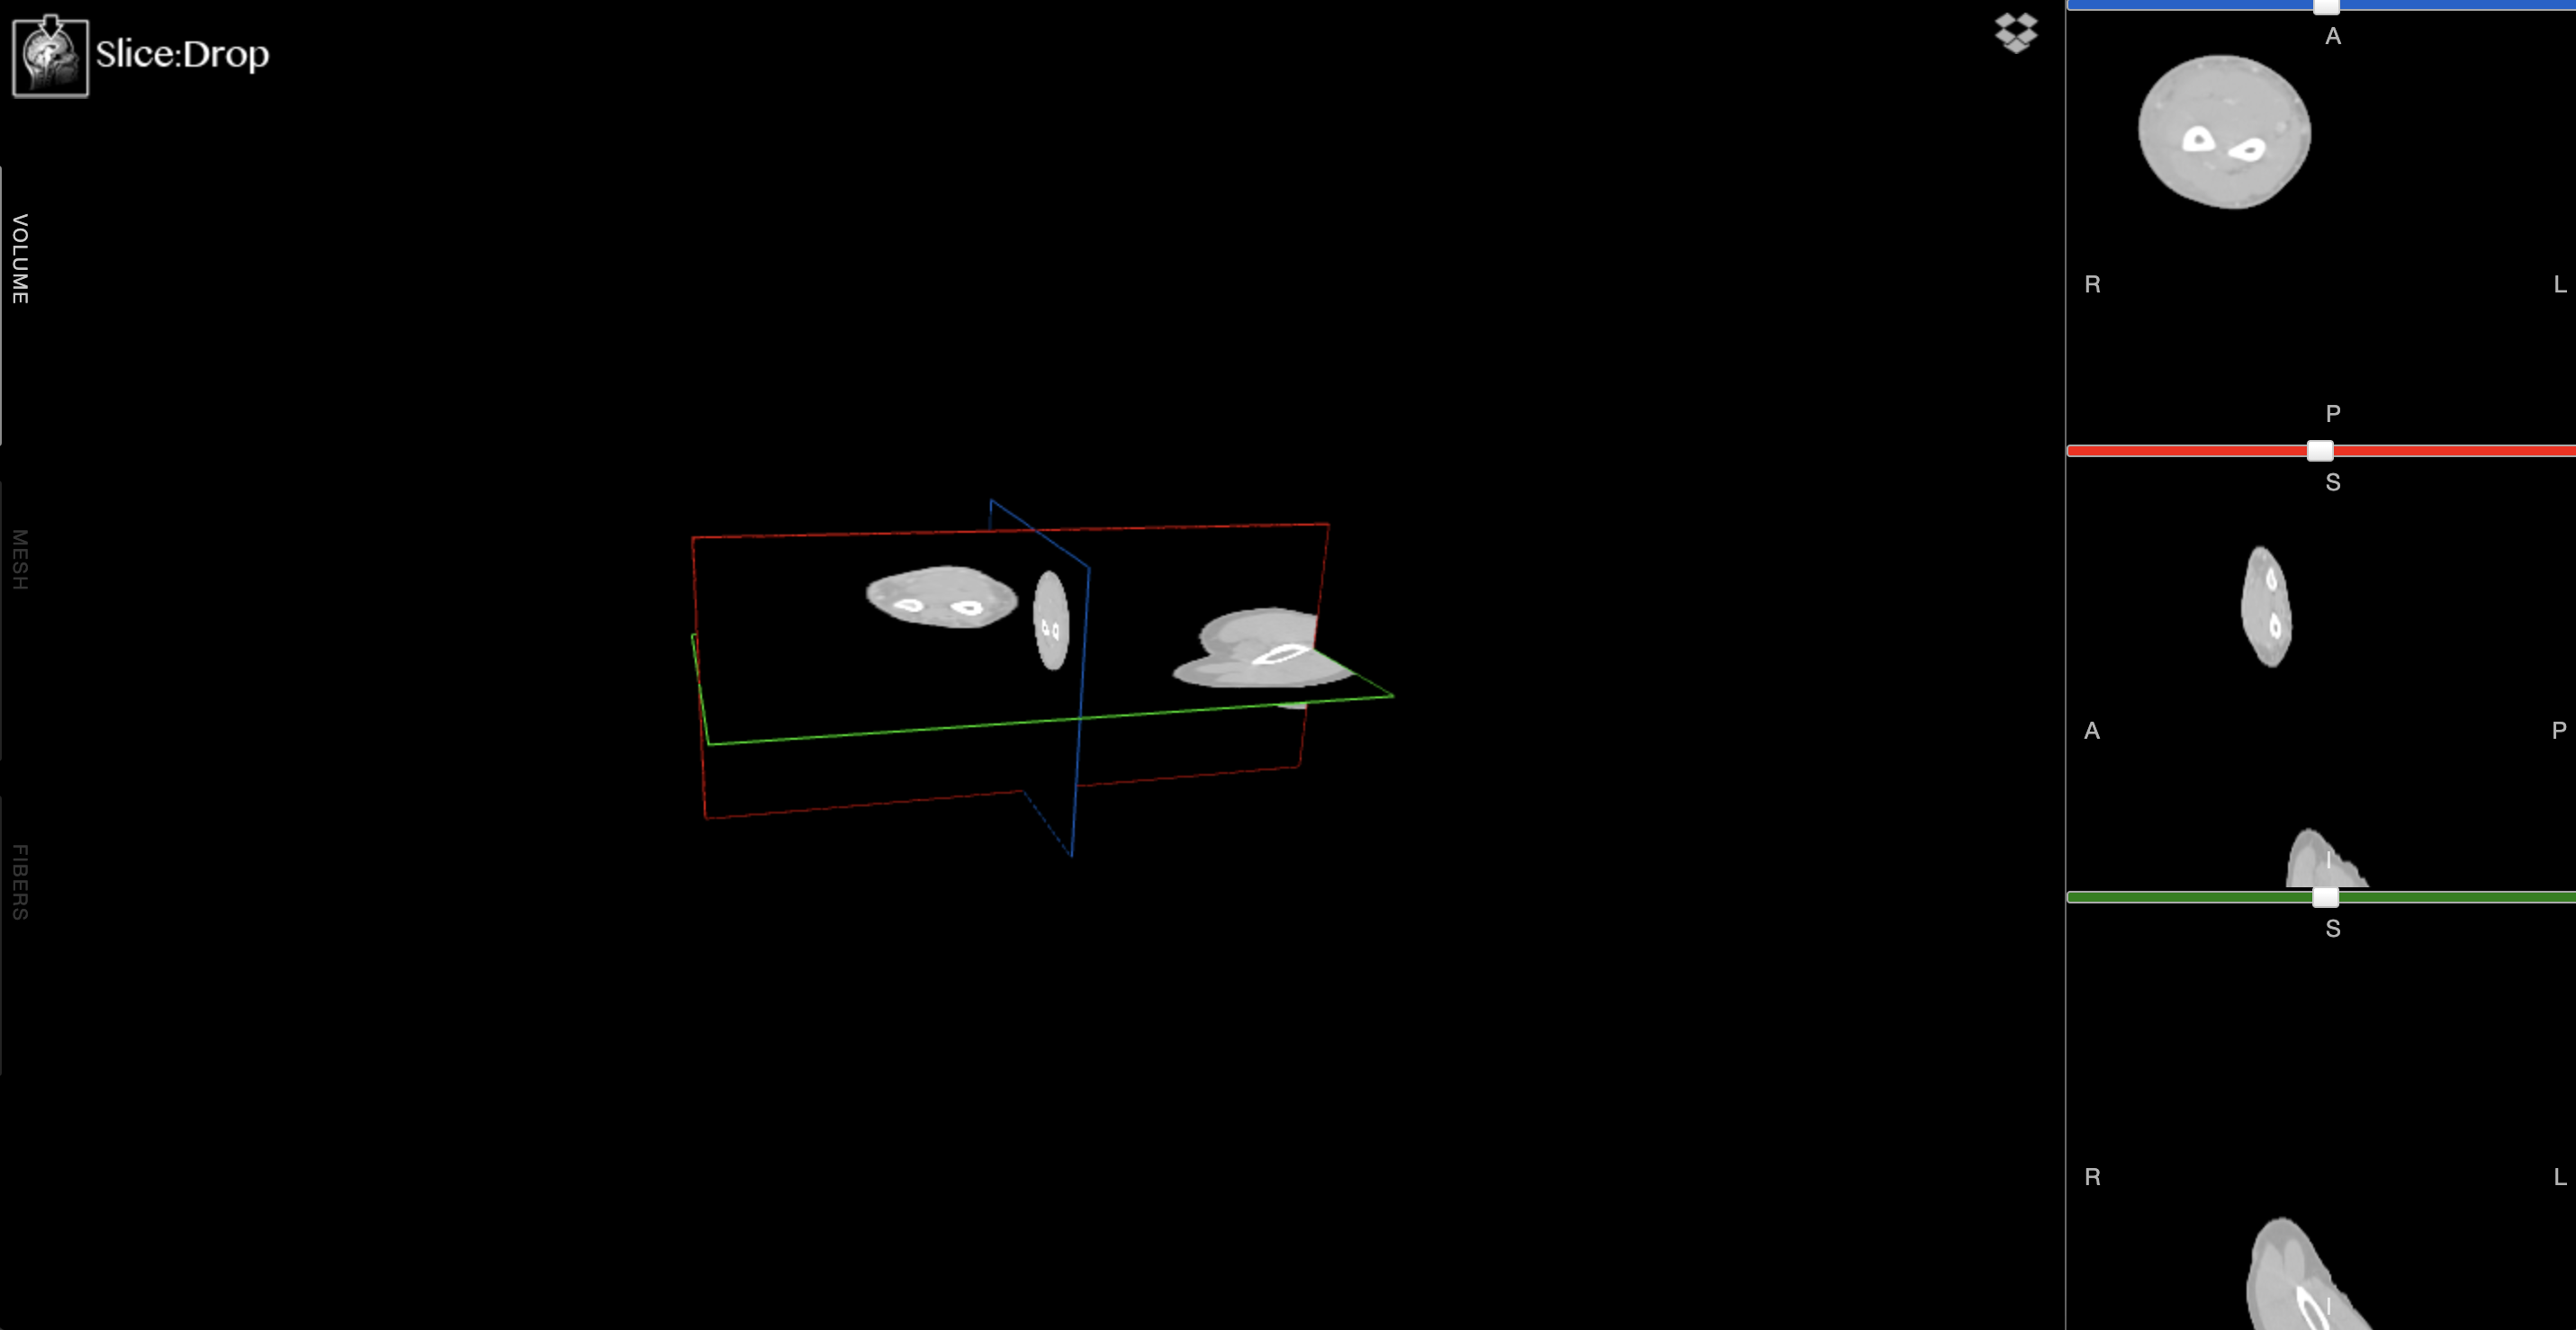

In [10]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [11]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

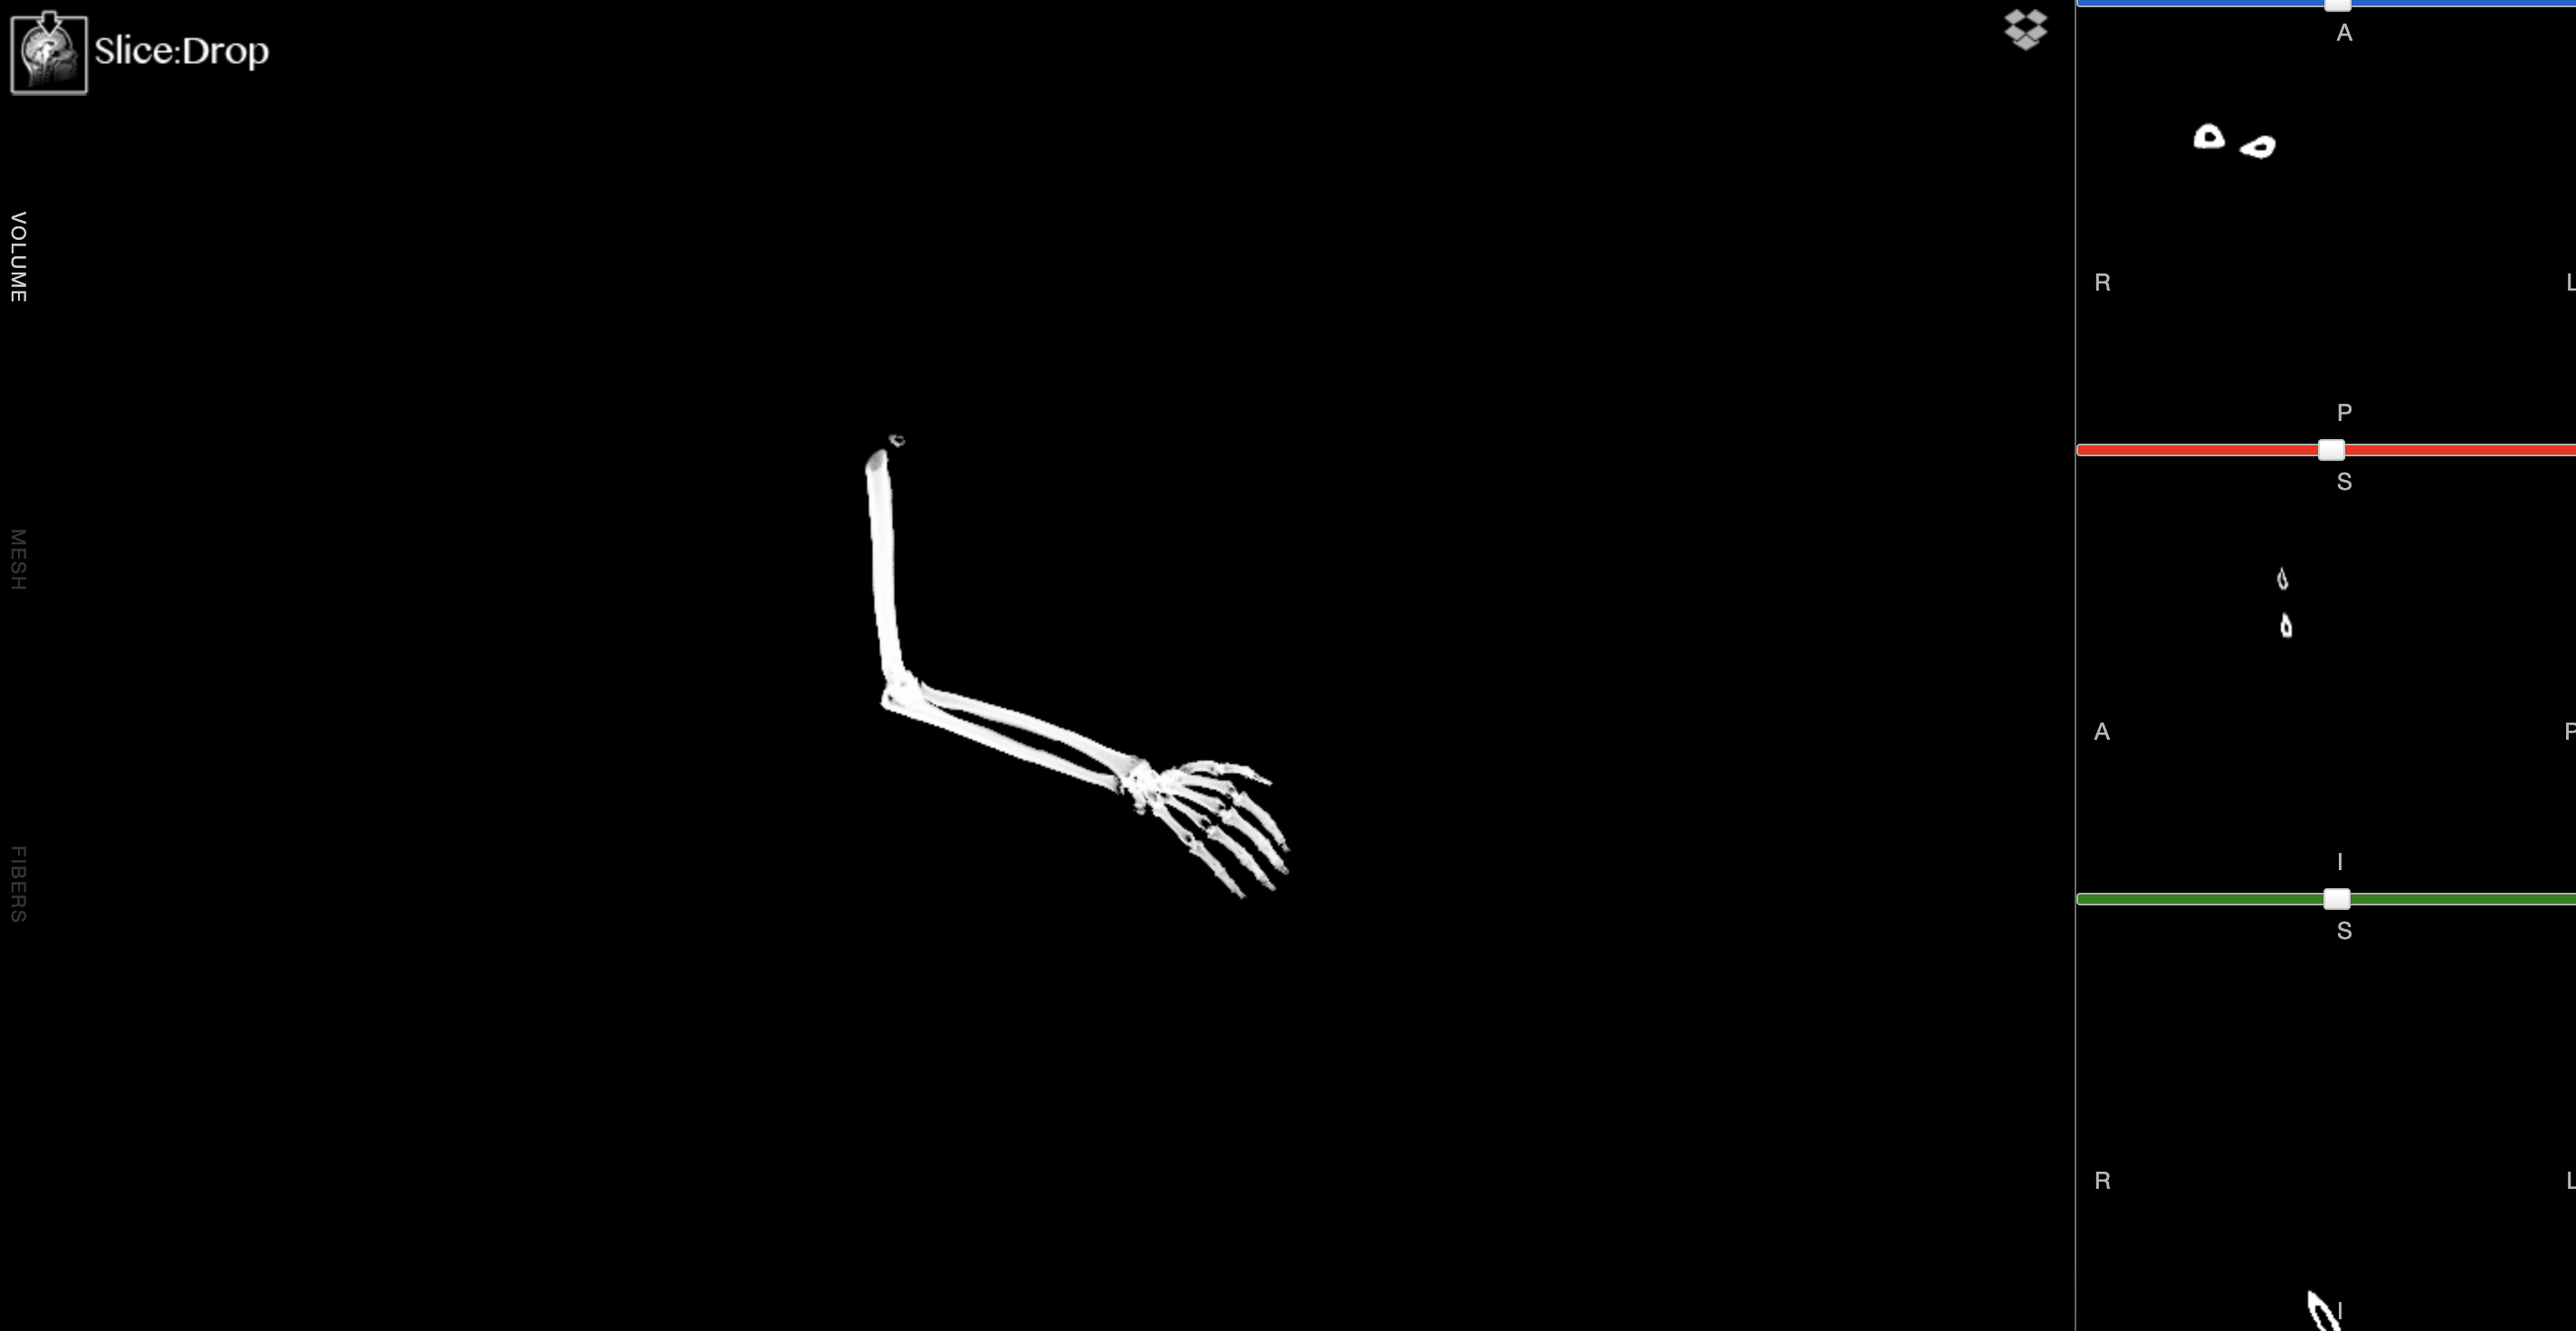

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [12]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [13]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [14]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [15]:
from pydicom import dcmread

In [16]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import numpy as np
import os

dir_path = "ct"
#DICOM files in the directory
file_names = os.listdir(dir_path)
file_names.sort()

# dimensions of first file
first_file_path = os.path.join(dir_path, file_names[0])
first_file = dcmread(first_file_path)
dims = list(first_file.pixel_array.shape) + [len(file_names)] #final list dimensions

#numpy array with zeros to allocate the data
ct_array = np.zeros(dims, dtype=np.uint16)

#Loop through all the DICOM files and store the image data
for i, file_name in enumerate(file_names):
    file_path = os.path.join(dir_path, file_name)
    dicom_file = dcmread(file_path)
    ct_array[:, :, i] = dicom_file.pixel_array

In [17]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

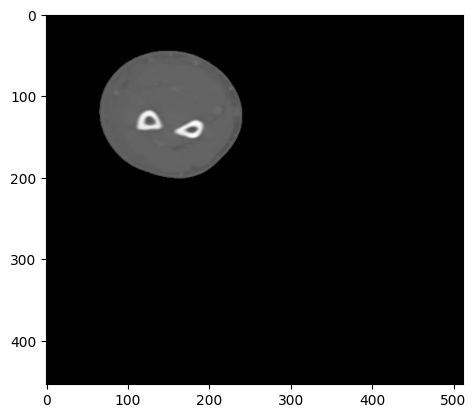

In [19]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt

axial = plt.plot()
plt.imshow(ct_array[:, :, dims[2]//2], cmap='gray')

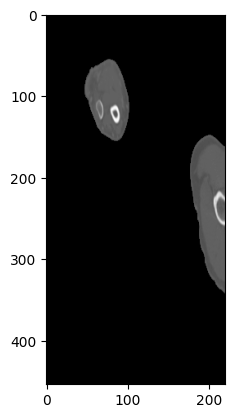

In [22]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal = plt.plot()
plt.imshow(ct_array[:, dims[1]//2, :], cmap='gray')

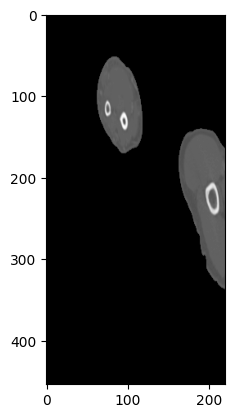

In [23]:
# TODO: YOUR CODE FOR CORONAL
coronal = plt.plot()
plt.imshow(ct_array[:, dims[0]//2, :], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [24]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [25]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [26]:
# TODO: YOUR CODE
dicom_file

window_center = dicom_file.WindowCenter
window_width = dicom_file.WindowWidth
rescale_int = dicom_file['RescaleIntercept'].value

In [31]:
print(rescale_int)
print(window_center)
print(window_width)

-1024
30
410


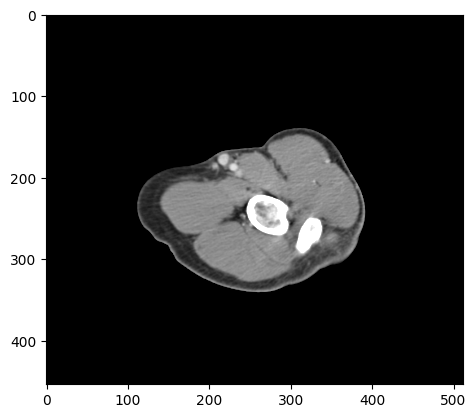

In [33]:
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [34]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

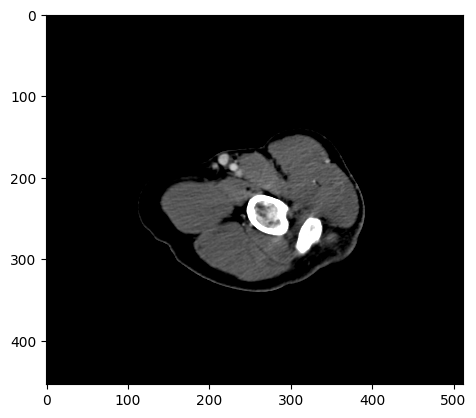

In [41]:
# TODO: YOUR CODE
window_center = 100
window_width = 300
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

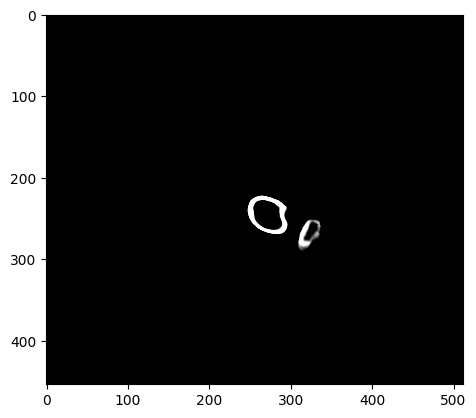

In [42]:
window_center = 500
window_width = 300
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

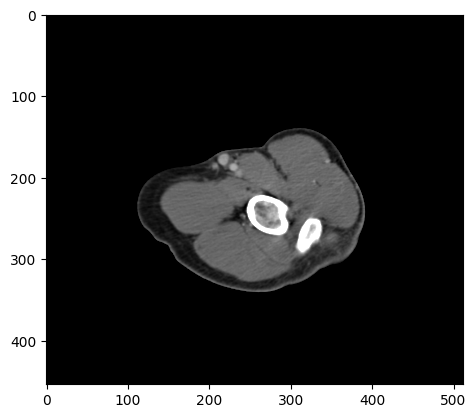

In [46]:
window_center = 100
window_width = 500
vmin = window_center - window_width/2
vmax = window_center + window_width/2
plt.imshow(dicom_file.pixel_array + rescale_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [47]:
# TODO: YOUR ANSWER
# For both the window_center and window_width values, 
# I believe it is important to first determine the use of window techniques.
# Both values can be changed according to the requirement, whether we want a more defined image of the higlights, 
# or an entire image altogether. But to conveniently visualize the center part, 
# it can be given more value than the width.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [48]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [57]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_mask = ct_array.copy()
fat_mask[fat_mask > -60] = 0
fat_mask = np.int16(fat_mask)

In [58]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
tissue_mask = ct_array.copy()
tissue_mask[tissue_mask < 30] = 0
tissue_mask[tissue_mask > 100] = 0
tissue_mask = np.int16(tissue_mask)

In [59]:
# TODO: YOUR CODE TO SEGMENT BONES
bone_mask = ct_array.copy()
bone_mask[bone_mask < 300] = 0
bone_mask = np.int16(bone_mask)

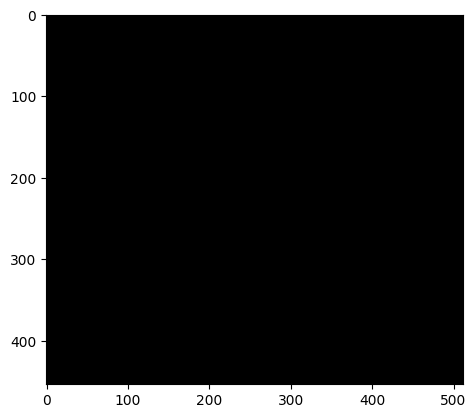

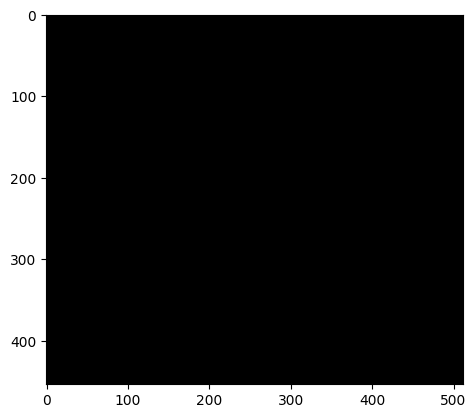

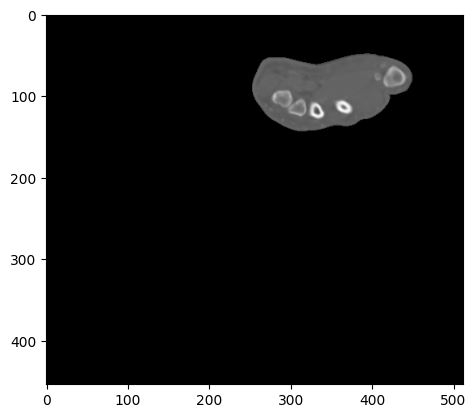

In [64]:
# Segment Fat
plt.imshow(fat_mask[:, :, 50], cmap='gray')
plt.show()

# Segment Soft tissue
plt.imshow(tissue_mask[:, :, 50], cmap='gray')
plt.show()

# Segment bone
plt.imshow(bone_mask[:, :, 50], cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

In [61]:
# TODO: Not really, I think the the problem is with the dataset and not with the segmentation technique.

In [62]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""